In [1]:
#====================#
#  Import Packages   #
#====================#

import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

import uproot3 as uproot

## DATAFRAME CREATION AND PROCESSING

In [2]:
# First define the column names for the input result text files
column_names = ["Row", "Run", "Subrun", "POT", "POT_runningSum"]

In [3]:
# Read in the result .txt files, including 3 categories (before/after trigger, 6 .txt total): common run/subrun between Pandora/WC, 
# Pandora exclusive run/subrun, WC exclusive run/subrun

#df_common_before = 
df_common_after = pd.read_csv("common_after_result.txt", sep='\t', header=None, names=column_names)

df_wc_exclusive_before = pd.read_csv("wc_exclusive_before_result.txt", sep='\t', header=None, names=column_names)
df_wc_exclusive_after = pd.read_csv("wc_exclusive_after_result.txt", sep='\t', header=None, names=column_names)

df_pandora_exclusive_before = pd.read_csv("pandora_exclusive_before_result.txt", sep='\t', header=None, names=column_names)
df_pandora_exclusive_after = pd.read_csv("pandora_exclusive_after_result.txt", sep='\t', header=None, names=column_names)

In [4]:
# SANITY CHECK CELL
df_common_after.head(5)

,Row,Run,Subrun,POT,POT_runningSum
0,1,17559,127,2.283000e+15,2283000000000000
1,2,17520,21,1.760000e+15,4043000000000000
2,3,17531,40,6.284000e+14,4671400000000000
3,4,17497,68,2.189000e+15,6860400000000000
4,5,17526,14,2.203000e+15,9063400000000000


In [5]:
# SANITY CHECK CELL
df_wc_exclusive_before.head(5)

,Row,Run,Subrun,POT,POT_runningSum
0,1,16118,19,1.787000e+15,1787000000000000
1,2,16118,22,1.239000e+15,3026000000000000
2,3,16118,35,1.921000e+15,4947000000000000
3,4,16118,45,1.607000e+15,6554000000000000
4,5,16118,51,1.509000e+15,8063000000000000


In [6]:
# SANITY CHECK CELL
df_wc_exclusive_after.head(5)

,Row,Run,Subrun,POT,POT_runningSum
0,1,17517,273,2.351000e+15,2351000000000000
1,2,17517,300,2.808000e+15,5159000000000000
2,3,17492,53,2.525000e+15,7684000000000000
3,4,17492,93,2.219000e+15,9903000000000000
4,5,17204,148,1.363000e+15,11266000000000000


In [7]:
# SANITY CHECK CELL
df_pandora_exclusive_before.head(-1)

,Row,Run,Subrun,POT,POT_runningSum
0,1,15125,189,4.403000e+14,440300000000000
1,2,16835,174,0.000000e+00,440300000000000
2,3,14183,4,0.000000e+00,440300000000000
3,4,14183,6,0.000000e+00,440300000000000
4,5,14183,11,0.000000e+00,440300000000000
...,...,...,...,...,...
27244,27245,16874,119,1.454000e+14,7565407516000000000
27245,27246,16874,408,1.857000e+15,7567264516000000000
27246,27247,15463,336,1.438000e+14,7567408316000000000
27247,27248,16869,158,0.000000e+00,7567408316000000000


In [8]:
# SANITY CHECK CELL
df_pandora_exclusive_after.head(-1)

,Row,Run,Subrun,POT,POT_runningSum
0,1,17269,19,0.000000e+00,0
1,2,17269,32,0.000000e+00,0
2,3,17269,42,0.000000e+00,0
3,4,17327,70,0.000000e+00,0
4,5,17327,74,0.000000e+00,0
...,...,...,...,...,...
5638,5639,17415,174,9.860000e+14,1431513911000000000
5639,5640,17415,198,1.232000e+15,1432745911000000000
5640,5641,17415,199,1.483000e+15,1434228911000000000
5641,5642,17415,269,1.866000e+15,1436094911000000000


In [ ]:
1436242911000000000+7567408316000000000

## PLOTTING/ANALYSIS

In [9]:
# Obtain the mean value of the individual POT and STD
mean_val_CA = df_common_after['POT'].mean()
std_value_CA = df_common_after['POT'].std()

In [10]:
#  Create a DataFrame with rows where POT is 0, if not, return all run/subrun contains non-zero POT

df_common_after_zero_pot = df_common_after[df_common_after['POT']==0]
zero_count = df_common_after_zero_pot.shape[0]
total = df_common_after.shape[0]

if zero_count==0:
    print("All run/subrun has a non-zero POT")
elif zero_count!=0:
    print(f"The number of run/subrun containing zero POT is {zero_count:.1f}")
    print(f"The percentage of run/subrun with zero POT in this set is {(zero_count/total)*100:.2f}")

The number of run/subrun containing zero POT is 2.0
The percentage of run/subrun with zero POT in this set is 0.00


In [11]:
# Displaying briefly the run/subrun containing POT of zero
df_common_after_zero_pot.head()

,Row,Run,Subrun,POT,POT_runningSum
33501,33502,17068,35,0.0,57182975280000450560
43563,43564,17274,19,0.0,73143447510000467968


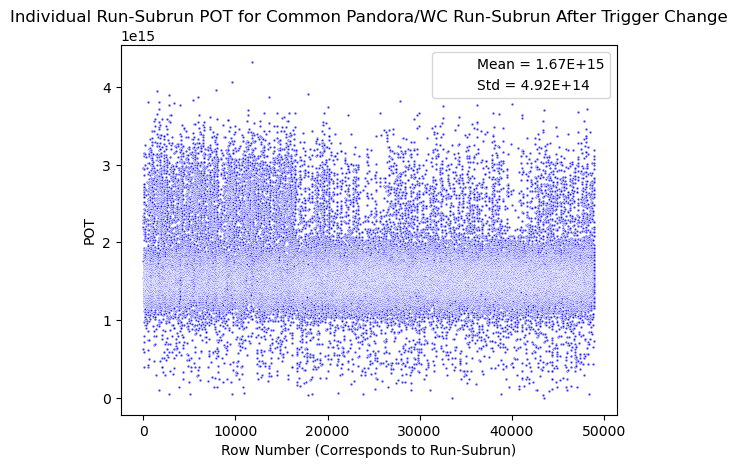

In [12]:
plt.scatter(df_common_after['Row'], df_common_after['POT'], s=4, 
                                                            color='b', 
                                                            alpha=0.8, 
                                                            edgecolors='w', 
                                                            linewidth=0.5)
plt.axhline(y=mean_val_CA, color='r', linestyle='-.', alpha=0, label=f'Mean = {mean_val_CA:.2E}')
plt.fill_between(df_common_after['Row'], mean_val_CA - std_value_CA, mean_val_CA + std_value_CA, color='r', alpha=0, label=f'Std = {std_value_CA:.2E}')
plt.title("Individual Run-Subrun POT for Common Pandora/WC Run-Subrun After Trigger Change")
plt.xlabel("Row Number (Corresponds to Run-Subrun)")
plt.ylabel("POT")
plt.legend()

In [13]:
# Obtain the mean value of the individual POT and STD
mean_val_PEB = df_pandora_exclusive_before['POT'].mean()
std_value_PEB = df_pandora_exclusive_before['POT'].std()

In [14]:
#  Create a DataFrame with rows where POT is 0, if not, return all run/subrun contains non-zero POT
df_pandora_exclusive_before_zero_pot = df_pandora_exclusive_before[df_pandora_exclusive_before['POT']==0]
zero_count = df_pandora_exclusive_before_zero_pot.shape[0]
total = df_pandora_exclusive_before.shape[0]

if zero_count==0:
    print("All run/subrun has a non-zero POT")
elif zero_count!=0:
    print(f"The number of run/subrun containing zero POT is {zero_count:.1f}")
    print(f"The percentage of run/subrun with zero POT in this set is {(zero_count/total)*100:.2f}")

The number of run/subrun containing zero POT is 21513.0
The percentage of run/subrun with zero POT in this set is 78.95


In [15]:
# Displaying briefly the run/subrun containing POT of zero
df_pandora_exclusive_before_zero_pot.head(-1)

,Row,Run,Subrun,POT,POT_runningSum
1,2,16835,174,0.0,440300000000000
2,3,14183,4,0.0,440300000000000
3,4,14183,6,0.0,440300000000000
4,5,14183,11,0.0,440300000000000
5,6,14183,13,0.0,440300000000000
...,...,...,...,...,...
27231,27232,16150,306,0.0,7548893116000000000
27232,27233,16150,317,0.0,7548893116000000000
27233,27234,16150,354,0.0,7548893116000000000
27247,27248,16869,158,0.0,7567408316000000000


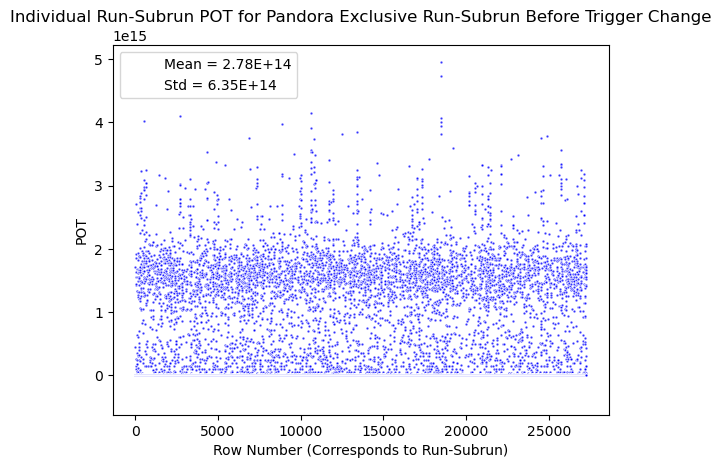

In [16]:
plt.scatter(df_pandora_exclusive_before['Row'], df_pandora_exclusive_before['POT'], s=4, 
                                                            color='b', 
                                                            alpha=0.8, 
                                                            edgecolors='w', 
                                                            linewidth=0.5)
plt.title("Individual Run-Subrun POT for Pandora Exclusive Run-Subrun Before Trigger Change")
plt.axhline(y=mean_val_PEB, color='r', linestyle='-.', alpha=0, label=f'Mean = {mean_val_PEB:.2E}')
plt.fill_between(df_pandora_exclusive_before['Row'], mean_val_PEB - std_value_PEB, mean_val_PEB + std_value_PEB, color='r', alpha=0, label=f'Std = {std_value_PEB:.2E}')
plt.xlabel("Row Number (Corresponds to Run-Subrun)")
plt.ylabel("POT")
plt.legend()

In [17]:
# Obtain the mean value of the individual POT and STD
mean_val_PEA = df_pandora_exclusive_after['POT'].mean()
std_value_PEA = df_pandora_exclusive_after['POT'].std()

In [18]:
#  Create a DataFrame with rows where POT is 0, if not, return all run/subrun contains non-zero POT
df_pandora_exclusive_after_zero_pot = df_pandora_exclusive_after[df_pandora_exclusive_after['POT']==0]
zero_count = df_pandora_exclusive_after_zero_pot.shape[0]
total = df_pandora_exclusive_after.shape[0]

if zero_count==0:
    print("All run/subrun has a non-zero POT")
elif zero_count!=0:
    print(f"The number of run/subrun containing zero POT is {zero_count:.1f}")
    print(f"The percentage of run/subrun with zero POT in this set is {(zero_count/total)*100:.5f}")

The number of run/subrun containing zero POT is 4464.0
The percentage of run/subrun with zero POT in this set is 79.09284


In [19]:
# Displaying briefly the run/subrun containing POT of zero
df_pandora_exclusive_after_zero_pot.head(-1)

,Row,Run,Subrun,POT,POT_runningSum
0,1,17269,19,0.0,0
1,2,17269,32,0.0,0
2,3,17269,42,0.0,0
3,4,17327,70,0.0,0
4,5,17327,74,0.0,0
...,...,...,...,...,...
5630,5631,17246,19,0.0,1426181911000000000
5631,5632,17246,20,0.0,1426181911000000000
5632,5633,17246,21,0.0,1426181911000000000
5633,5634,17246,22,0.0,1426181911000000000


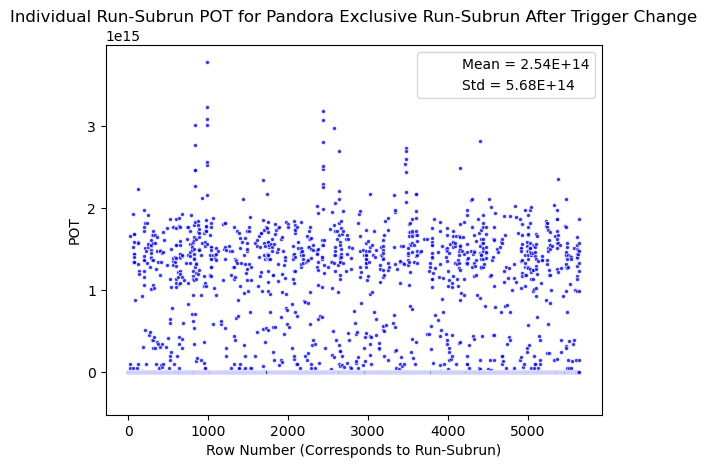

In [20]:
plt.scatter(df_pandora_exclusive_after['Row'], df_pandora_exclusive_after['POT'], s=8, 
                                                            color='b', 
                                                            alpha=0.8, 
                                                            edgecolors='w', 
                                                            linewidth=0.5)
plt.axhline(y=mean_val_PEA, color='r', linestyle='-.', alpha=0, label=f'Mean = {mean_val_PEA:.2E}')
plt.fill_between(df_pandora_exclusive_after['Row'], mean_val_PEA - std_value_PEA, mean_val_PEA + std_value_PEA, color='r', alpha=0, label=f'Std = {std_value_PEA:.2E}')
plt.title("Individual Run-Subrun POT for Pandora Exclusive Run-Subrun After Trigger Change")
plt.xlabel("Row Number (Corresponds to Run-Subrun)")
plt.ylabel("POT")
plt.legend()

In [21]:
# Obtain the mean value of the individual POT and STD
mean_val_WEB = df_wc_exclusive_before['POT'].mean()
std_value_WEB = df_wc_exclusive_before['POT'].std()

In [22]:
#  Create a DataFrame with rows where POT is 0, if not, return all run/subrun contains non-zero POT
df_wc_exclusive_before_zero_pot = df_wc_exclusive_before[df_wc_exclusive_before['POT']==0]
zero_count = df_wc_exclusive_before_zero_pot.shape[0]
total = df_wc_exclusive_before.shape[0]

if zero_count==0:
    print("All run/subrun has a non-zero POT")
elif zero_count!=0:
    print(f"The number of run/subrun containing zero POT is {zero_count:.1f}")
    print(f"The percentage of run/subrun with zero POT in this set is {zero_count/total:.5f}")

All run/subrun has a non-zero POT


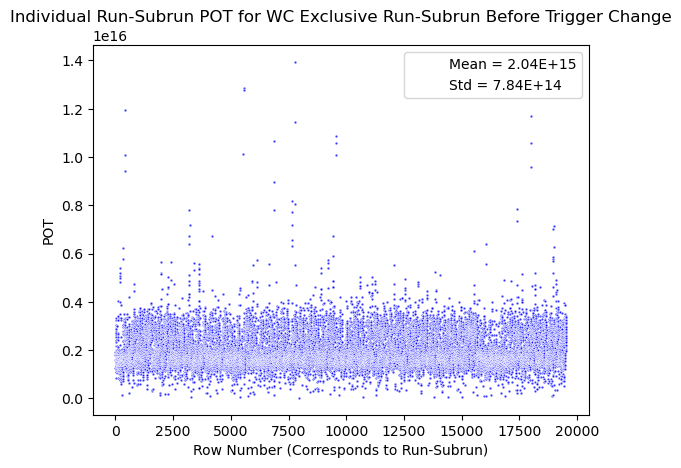

In [23]:
plt.scatter(df_wc_exclusive_before['Row'], df_wc_exclusive_before['POT'], s=4, 
                                                            color='b', 
                                                            alpha=0.8, 
                                                            edgecolors='w', 
                                                            linewidth=0.5)
plt.axhline(y=mean_val_WEB, color='r', linestyle='-.', alpha=0, label=f'Mean = {mean_val_WEB:.2E}')
plt.fill_between(df_wc_exclusive_before['Row'], mean_val_WEB - std_value_WEB, mean_val_WEB + std_value_WEB, color='r', alpha=0, label=f'Std = {std_value_WEB:.2E}')
plt.title("Individual Run-Subrun POT for WC Exclusive Run-Subrun Before Trigger Change")
plt.xlabel("Row Number (Corresponds to Run-Subrun)")
plt.ylabel("POT")
plt.legend()

In [24]:
# Obtain the mean value of the individual POT and STD
mean_val_WEA = df_wc_exclusive_after['POT'].mean()
std_value_WEA = df_wc_exclusive_after['POT'].std()

In [25]:
#  Create a DataFrame with rows where POT is 0, if not, return all run/subrun contains non-zero POT
df_wc_exclusive_after_zero_pot = df_wc_exclusive_after[df_wc_exclusive_after['POT']==0]
zero_count = df_wc_exclusive_after_zero_pot.shape[0]
total = df_wc_exclusive_after.shape[0]

if zero_count==0:
    print("All run/subrun has a non-zero POT")
elif zero_count!=0:
    print(f"The number of run/subrun containing zero POT is {zero_count:.1f}")
    print(f"The percentage of run/subrun with zero POT in this set is {zero_count/total:.5f}")

All run/subrun has a non-zero POT


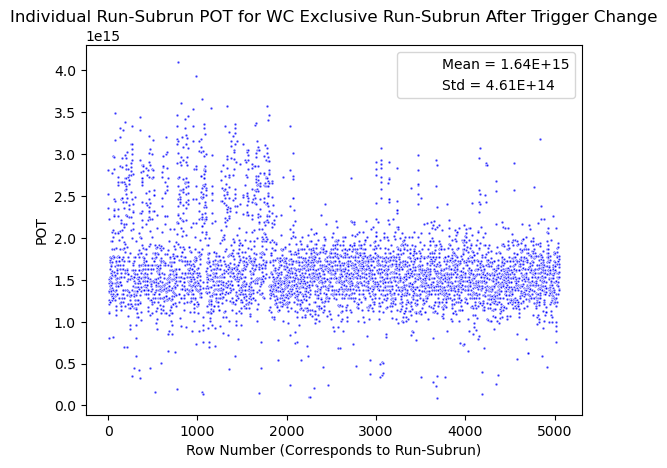

In [26]:
plt.scatter(df_wc_exclusive_after['Row'], df_wc_exclusive_after['POT'], s=4, 
                                                            color='b', 
                                                            alpha=0.8, 
                                                            edgecolors='w', 
                                                            linewidth=0.5)
plt.axhline(y=mean_val_WEA, color='r', linestyle='-.', alpha=0, label=f'Mean = {mean_val_WEA:.2E}')
plt.fill_between(df_wc_exclusive_after['Row'], mean_val_WEA - std_value_WEA, mean_val_WEA + std_value_WEA, color='r', alpha=0, label=f'Std = {std_value_WEA:.2E}')
plt.title("Individual Run-Subrun POT for WC Exclusive Run-Subrun After Trigger Change")
plt.xlabel("Row Number (Corresponds to Run-Subrun)")
plt.ylabel("POT")
plt.legend()